# Bitcoin Stock Prediction Using Deep Learning and Sentiment Analysis
---

### This notebook analyzes Bitcoin historical values and how we can predict next values for Bitcoin closing prices

## Introduction

### What is a crypto currency  and why Bitcoin?

According to wikipedia, a cryptocurrency is a digital asset designed to work as a medium of exchange using "cryptography" to secure the transactions and to control the creation of additional units of the currency by "mining". 

While the best-known example of a cryptocurrency is Bitcoin, there are more than 100 other tradable cryptocurrencies, called altcoins (meaning alternative to Bitcoin), competing each other and with Bitcoin. 

The motive behind this competition is that there are a number of design flaws in Bitcoin, and people are trying to invent new coins to overcome these defects hoping their inventions will eventually replace Bitcoin. 

To June 2017, the total market capital of all cryptocurrencies is 102 billion in USD, 41 of which is of Bitcoin. Therefore, regardless of its design faults, Bitcoin is still the dominant cryptocurrency in markets. As a result, many altcoins cannot be bought with fiat currencies, but only be traded against Bitcoin. 

Hence, we chose Bitcoin as our commodity.

The ubiquity of Internet access has triggered the emergence of currencies distinct from those used in the prevalent monetary system. The advent of cryptocurrencies based on a unique method called “mining” has brought about significant changes in the online economic activities of users.

Cryptocurrencies are primarily characterized by fluctuations in their price and number of transactions [\[1\]](#ref1)[\[2\]](#ref2). Although Bitcoin was first introduced in 2008 [\[2\]](#ref2)[\[3\]](#ref3), it had witnessed no significant fluctuation in its price and number of transactions until the end of 2013 [\[2\]](#ref2), when it began to garner worldwide attention, and witnessed a significant rise and fluctuation in its price and number of transactions. Such unstable fluctuations have served as an opportunity for speculation for some users while hindering most others from using cryptocurrencies [\[1\]](#ref1)[\[4\]](#ref4)[\[5\]](#ref5)

## Methods

Our research will follow a comparative approach. Our first framework is a Recurrent Neural Network (LSTM) trained on 3 popular stock market indicators and past prices as key data points to find an optimal technique for cryptocurrency stock market prediction. 

Our second framework is an extended approach to train our model including the sentiments of the public tweets and past prices as key data points.

Comparison will be made on the basis of their performance. Both techniques have some advantages and disadvantages. Our research will analyze advantages and limitations of these techniques to find which technique is comparatively better for specifically Bitcoin stock market prediction. 

## Background

In a traditional recurrent neural network, during the gradient back-propagation phase, the gradient signal can end up being multiplied a large number of times (as many as the number of time steps) by the weight matrix associated with the connections between the neurons of the recurrent hidden layer. This means that, the magnitude of weights in the transition matrix can have a strong impact on the learning process.

If the weights in this matrix are small (or, more formally, if the leading eigenvalue of the weight matrix is smaller than 1.0), it can lead to a situation called vanishing gradients where the gradient signal gets so small that learning either becomes very slow or stops working altogether. It can also exacerbate the task of learning long-term dependencies in the data. Conversely, if the weights in this matrix are large (or, again, more formally, if the leading eigenvalue of the weight matrix is larger than 1.0), it can lead to a situation where the gradient signal is so large that it can cause learning to diverge. This is often referred to as exploding gradients.

These issues are the main motivation behind the LSTM model which introduces a new structure called a memory cell. A memory cell is composed of four main elements: an input gate, a neuron with a self-recurrent connection (a connection to itself), a forget gate and an output gate. The self-recurrent connection has a weight of 1.0 and ensures that, barring any outside interference, the state of a memory cell can remain constant from one time step to another.

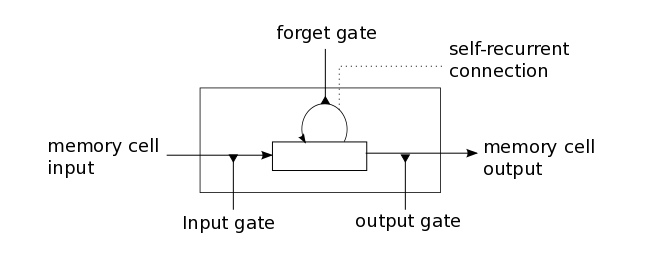

The gates serve to modulate the interactions between the memory cell itself and its environment. The input gate can allow incoming signal to alter the state of the memory cell or block it. On the other hand, the output gate can allow the state of the memory cell to have an effect on other neurons or prevent it. Finally, the forget gate can modulate the memory cell’s self-recurrent connection, allowing the cell to remember or forget its previous state, as needed.

We believe the biggest difference between the NLP and financial analysis is that language has some guarantee of structure, it’s just that the rules of the structure are vague. Markets, on the other hand, don’t come with a promise of a learnable structure, that such a structure exists is the assumption that this project would prove or disprove (rather it might prove or disprove if we can find that structure).

Assuming that a structure exists; the idea of summarizing the current state of the market in the same way we encode the semantics of a paragraph seems plausible to us.

## A Data-Driven Approach To Cryptocurrency Speculation

*How do Bitcoin markets behave? What are the causes of the sudden spikes and dips in cryptocurrency values? How can we predict what will happen next?*

Research on the attributes of cryptocurrencies has made steady progress but has a long way to go. Most researchers analyze user sentiments related to cryptocurrencies on social media, e.g., Twitter, or quantified Web search queries on search engines, such as Google, as well as fluctuations in price and trade volume to determine any relation [\[6–10\]](#ref6to10). Past studies have been limited to Bitcoin because the large amount of data that it provides eliminates the need to build a model to predict fluctuations in the price and number of transactions of diverse cryptocurrencies.

Articles on cryptocurrencies, such as Bitcoin, are rife with speculation these days, with hundreds of self-proclaimed experts advocating for the trends that they expect to emerge. What is lacking from many of these analyses is a strong data analysis foundation to backup the claims. 

So, we felt that analysis of most recent tweets for the term **Bitcoin** to predict its closing price for the next day seemed like the most unbiased approach to resolving the biased opinions strewn around the web. 

## Input Data

### Initial Features Set

Our initial features set include the Adjusted Open, Adjusted High, Adjusted Low, Adjusted Close, Adjusted Volume for BTC, Adjusted Volume for Currency and Weighted Price for Bitcoin retrieved using [Quandl's free Bitcoin API](https://blog.quandl.com/api-for-bitcoin-data) for dates ranging from January 7, 2014 to March 12, 2018.

We have used pickle to serialize and save the downloaded data as a file, which will prevent our script from re-downloading the same data each time we run the script.

In [1]:
# Define Quandl Helper Function to download and cache bitcoin dataset from Quandl
import json


import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

def get_quandl_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df


# Pull Kraken BTC exchange historical pricing data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

btc_usd_price_kraken.head()

Loaded BCHARTS/KRAKENUSD from cache


,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2014-01-07,874.67040,892.06753,810.00000,810.00000,15.622378,13151.472844,841.835522
2014-01-08,810.00000,899.84281,788.00000,824.98287,19.182756,16097.329584,839.156269
2014-01-09,825.56345,870.00000,807.42084,841.86934,8.158335,6784.249982,831.572913
2014-01-10,839.99000,857.34056,817.00000,857.33056,8.024510,6780.220188,844.938794
2014-01-11,858.20000,918.05471,857.16554,899.84105,18.748285,16698.566929,890.671709


In [2]:
# Chart the BTC close pricing data
#% matplotlib inline
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Close'])
py.iplot([btc_trace])

### Observations

There are a few notable down-spikes, particularly in late 2014 and early 2016. These spikes are specific to the Kraken dataset, and we obviously don't want them to be reflected in our overall pricing analysis.

The nature of Bitcoin exchanges is that the pricing is determined by supply and demand, hence no single exchange contains a true "master price" of Bitcoin. To solve this issue, along with that of down-spikes, we pulled data from three more major Bitcoin changes to calculate an aggregate Bitcoin price index.

In [3]:
# Pull pricing data for 3 more BTC exchanges
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Loaded BCHARTS/COINBASEUSD from cache
Loaded BCHARTS/BITSTAMPUSD from cache
Loaded BCHARTS/ITBITUSD from cache


In [4]:
# Merging All Of The Pricing Data Into A Single Dataframe
def merge_dfs_on_column(dataframes, labels, col):
    # Merge a single column of each dataframe into a new combined dataframe
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

# Merging the BTC price dataseries' into a single dataframe on their "Close Price" column
btc_usd_datasets_close = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Close')
btc_usd_datasets_open = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Open')
btc_usd_datasets_high = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'High')
btc_usd_datasets_low = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Low')

btc_usd_datasets_close.tail()

,BITSTAMP,COINBASE,ITBIT,KRAKEN
Date,,,,
2018-03-16,8258.54,8275.00,8268.00,NaN
2018-03-17,7860.83,7857.60,7882.13,NaN
2018-03-18,8188.24,8192.00,8198.65,NaN
2018-03-19,8596.93,8589.00,8595.66,NaN
2018-03-20,8940.11,8940.45,8970.30,NaN


### Visualizing the Pricing Datasets

In [5]:
# Visualize The Pricing Datasets

# Helper function to provide a single-line command to compare each column in the dataframe
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    #Generate a scatter plot of the entire dataframe
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)
    
# Plot all of the BTC exchange closing prices
df_scatter(btc_usd_datasets_close, 'Bitcoin Closing Price (USD) By Exchange')

![Visualization.png](image/Visualization.png)

### Observations

Although the four series follow roughly the same path, there are various irregularities in each that should be eliminated. Since the price of Bitcoin has never been equal to zero in the timeframe that we are examining it makes sense to remove all of the zero values from the combined dataframe.

In [6]:
# Remove "0" values
btc_usd_datasets_close.replace(0, np.nan, inplace=True)
btc_usd_datasets_open.replace(0, np.nan, inplace=True)
btc_usd_datasets_high.replace(0, np.nan, inplace=True)
btc_usd_datasets_low.replace(0, np.nan, inplace=True)

# Plot the cleaned dataframe
df_scatter(btc_usd_datasets_close, 'Bitcoin Closing Price (USD) By Exchange')

![Visualization.png](Image/Visualization_new.png)

In [7]:
# Calculate the average BTC closing price as a new column
btc_usd_datasets_close['avg_btc_close_price_usd'] = btc_usd_datasets_close.mean(axis=1)
btc_usd_datasets_open['avg_btc_open_price_usd'] = btc_usd_datasets_open.mean(axis=1)
btc_usd_datasets_high['avg_btc_high_price_usd'] = btc_usd_datasets_high.mean(axis=1)
btc_usd_datasets_low['avg_btc_low_price_usd'] = btc_usd_datasets_low.mean(axis=1)

# Plot the average BTC closing price
btc_trace = go.Scatter(x=btc_usd_datasets_close.index, y=btc_usd_datasets_close['avg_btc_close_price_usd'])
py.iplot([btc_trace])

![Visualization.png](image/Visualization_new_2.png)

In [258]:
btc_usd_datasets_close_final = btc_usd_datasets_close['avg_btc_close_price_usd'].copy()
btc_usd_datasets_open_final = btc_usd_datasets_open['avg_btc_open_price_usd'].copy()
btc_usd_datasets_high_final = btc_usd_datasets_high['avg_btc_high_price_usd'].copy()
btc_usd_datasets_low_final = btc_usd_datasets_low['avg_btc_low_price_usd'].copy()

btc_usd_datasets_close_final = btc_usd_datasets_close_final.reset_index()
btc_usd_datasets_open_final = btc_usd_datasets_open_final.reset_index()
btc_usd_datasets_high_final = btc_usd_datasets_high_final.reset_index()
btc_usd_datasets_low_final = btc_usd_datasets_low_final.reset_index()

btc_usd_datasets_open_final.columns = ['Date','Average Open Price (USD)']
btc_usd_datasets_high_final.columns = ['Date','Average High Price (USD)']
btc_usd_datasets_low_final.columns = ['Date','Average Low Price (USD)']
btc_usd_datasets_close_final.columns = ['Date','Average Close Price (USD)']

btc_usd_datasets_close_final.head()

,Date,Average Close Price (USD)
0,2011-09-13,5.97
1,2011-09-14,5.53
2,2011-09-15,5.13
3,2011-09-16,4.85
4,2011-09-17,4.87


In [259]:

btc_usd_datasets_close_final.tail()

,Date,Average Close Price (USD)
2408,2018-04-17,7891.8425
2409,2018-04-18,8165.7500
2410,2018-04-19,8274.1525
2411,2018-04-20,8865.4800
2412,2018-04-21,8811.2750


In [260]:
btc_usd_datasets_final_1 = pd.merge(btc_usd_datasets_open_final, btc_usd_datasets_high_final, on='Date')
btc_usd_datasets_final_2 = pd.merge(btc_usd_datasets_low_final, btc_usd_datasets_close_final, on='Date')                                  
btc_usd_datasets_final = pd.merge(btc_usd_datasets_final_1, btc_usd_datasets_final_2, on='Date') 
btc_usd_datasets_final.to_csv('BTC_USD.csv', index=False)
btc_usd_datasets_final.head()                                   

,Date,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
0,2011-09-13,5.80,6.00,5.65,5.97
1,2011-09-14,5.58,5.72,5.52,5.53
2,2011-09-15,5.12,5.24,5.00,5.13
3,2011-09-16,4.82,4.87,4.80,4.85
4,2011-09-17,4.87,4.87,4.87,4.87


In [261]:
btc_usd_datasets_final.tail(2)

,Date,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
2411,2018-04-20,8272.925,8936.0425,8220.3050,8865.480
2412,2018-04-21,8866.700,9043.5325,8616.2625,8811.275


This features set builds out my dataframe from a csv file named [**BTC_USD.csv**](BTC_USD.csv) that I generated by extending the protocol governing the definition of my initial features set.

## The model in theory

We are going to study the below features, i.e., technical indicators.
- MACD (Trend Indicator)
- Stochastics (Momentum Indicator)
- Average True Range (Volume Indicator)

## Functions

### Trend Indicator

[What is a trend?](https://www.investopedia.com/university/technical/techanalysis3.asp)

**Exponential Moving Average:** Is a type of infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. It is similar to a simple moving average, except that more weight is given to the latest data. It's also known as the exponentially weighted moving average. This type of moving average reacts faster to recent price changes than a simple moving average. The 12- and 26-day EMAs are the most popular short-term averages and they are used to create indicators like the moving average convergence divergence (MACD) and the percentage price oscillator (PPO). 

![alt text](EMA.png "EMA")

**MACD:**  The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.
<img src="http://i68.tinypic.com/289ie1l.png">

### Momentum Indicator

[What is momentum?](https://www.investopedia.com/terms/m/momentum.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186)

**Stochastics oscillator:** The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods. It measures whether the closing price of a security is closer to the high or the low. It is based on the assumption that when a market is trending upward, the closing price will be closer to the highest price, and, when it is trending downward, the closing price will be closer to the lowest price.

<img src="http://i66.tinypic.com/2vam3uo.png">

### Volume Indicator

[What is volume?](https://www.investopedia.com/terms/v/volume.asp)

**Average True Range:** Is an indicator to measure the volalitility (NOT price direction). The true range indicator is the largest of:
- Method A: Current High less the current Low
- Method B: Current High less the previous Close (absolute value)
- Method C: Current Low less the previous Close (absolute value)

The average true range is a moving average, generally 14 days, of the true ranges. Basically a stock experiencing a high level of volatility has a higher ATR, and a low volatility stock has a lower ATR. 

Calculation:
<img src="http://i68.tinypic.com/e0kggi.png">

In [262]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    
    return Histogram

def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['Average High Price (USD)']-df['Average Low Price (USD)'])
    '''
    Method B: Current High less the previous Close (absolute value)
    '''
    df['H-PC'] = abs(df['Average High Price (USD)']-df['Average Close Price (USD)'].shift(1))
    '''
    Method C: Current Low less the previous Close (absolute value)
    '''
    df['L-PC'] = abs(df['Average Low Price (USD)']-df['Average Close Price (USD)'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

### Read Data

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

df = pd.read_csv('BTC_USD.csv',usecols=[1,2,3,4])

dfPrices = pd.read_csv('BTC_USD.csv',usecols=[4])

In [264]:
dfPrices.head(2)

,Average Close Price (USD)
0,5.97
1,5.53


## Plot Data

### Plotting Price

In [265]:
price = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()

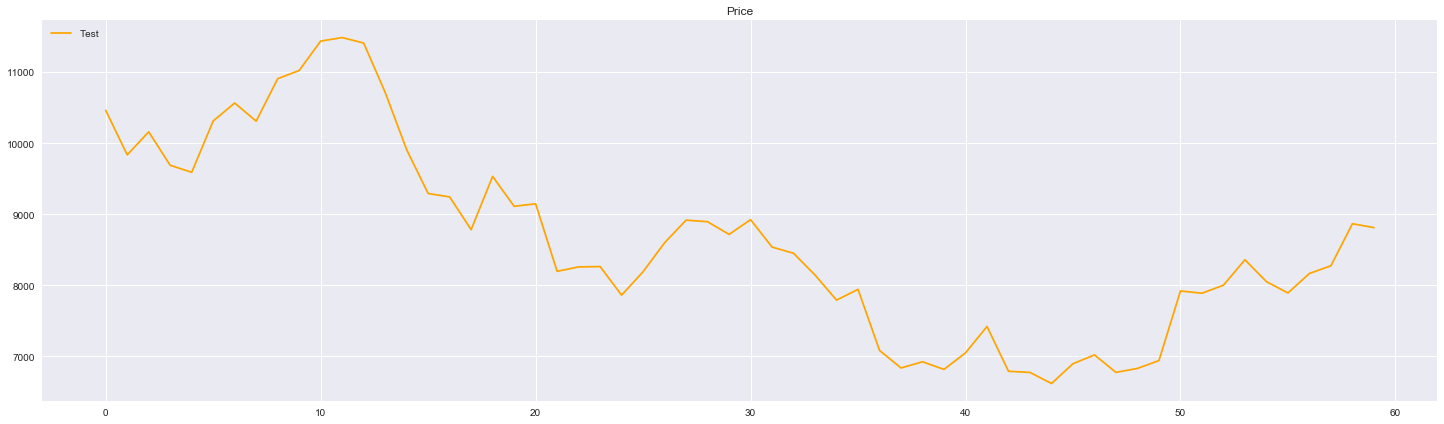

In [266]:
prices = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()
plt.figure(figsize=(25,7))
plt.plot(prices,label='Test',color='orange')
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

### Plotting MACD

In [267]:
macd = MACD(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],12,26,9)

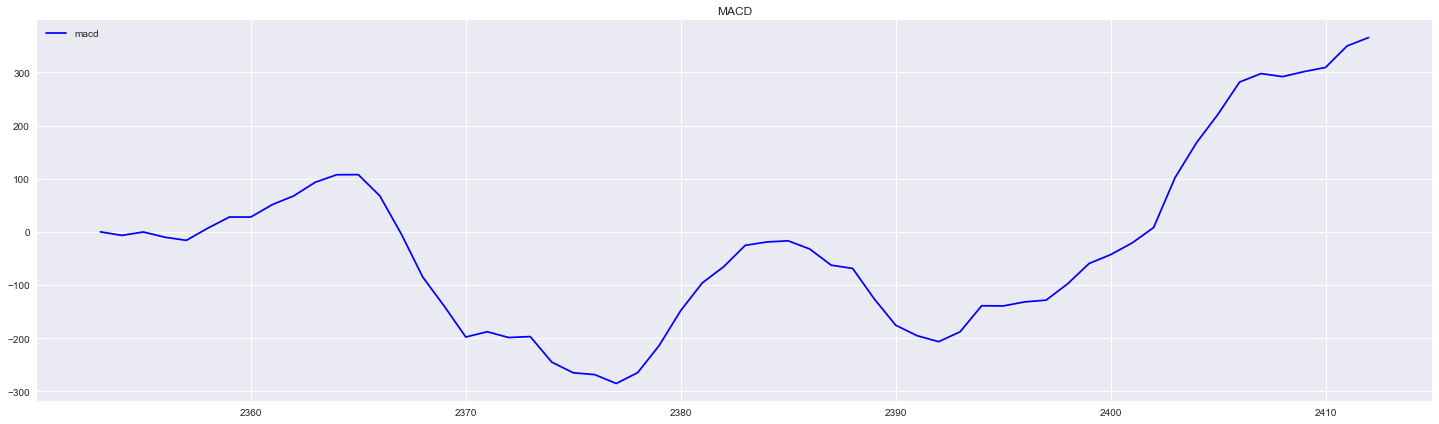

In [268]:
plt.figure(figsize=(25,7))
plt.plot(macd,label='macd',color='blue')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

### Plotting Stochastics Oscillator

In [269]:
stochastics = stochastics_oscillator(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],14)

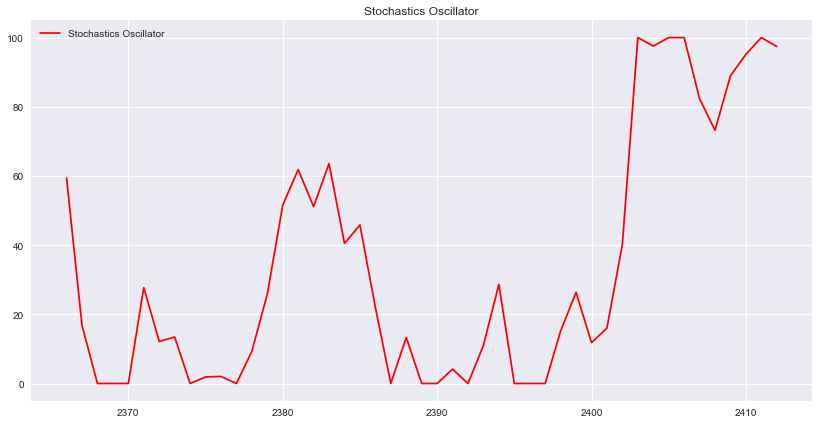

In [270]:
plt.figure(figsize=(14,7))
#First 100 points due to extreme density
plt.plot(stochastics[0:100],label='Stochastics Oscillator',color='red')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

### Plotting Average True Range

In [272]:
atr = ATR(df.iloc[len(df.index)-60:len(df.index)],14)

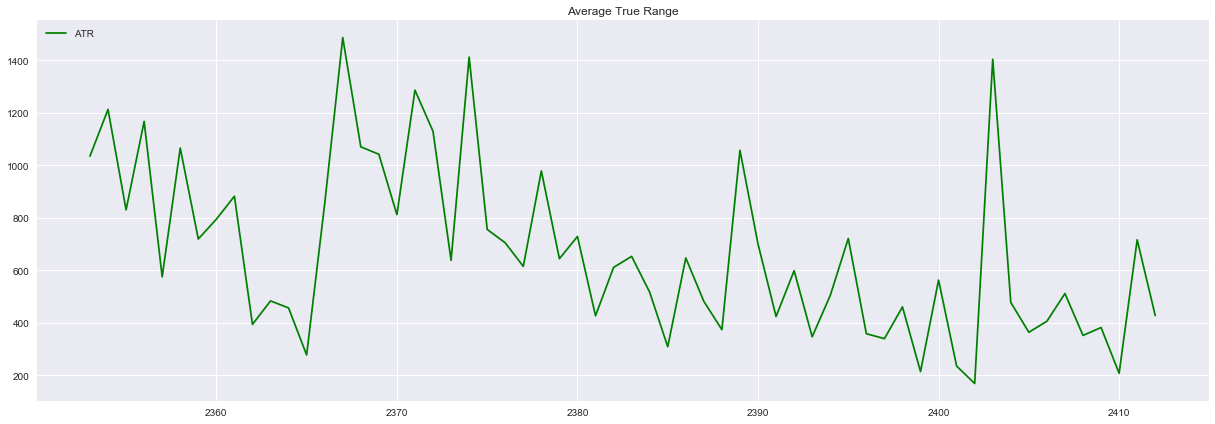

In [273]:
plt.figure(figsize=(21,7))
#First 100 points due to extreme density
plt.plot(atr[0:100],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

## Create Final Dataframe and Save Data

In [274]:
dfPriceShift = dfPrices.shift(-1)
dfPriceShift.rename(columns={'Average Close Price (USD)':'Average Close Price Target (USD)'}, inplace=True)
dfPriceShift.head(2)

,Average Close Price Target (USD)
0,5.53
1,5.13


In [275]:
macd = MACD(dfPrices,12,26,9)
macd.rename(columns={'Average Close Price (USD)':'MACD'}, inplace=True)

In [276]:
stochastics = stochastics_oscillator(dfPrices,14)
stochastics.rename(columns={'Average Close Price (USD)':'Stochastics'}, inplace=True)

In [277]:
atr = ATR(df,14)
atr.rename(columns={0:'ATR'}, inplace=True)

In [278]:
final_data = pd.concat([dfPrices,dfPriceShift,macd,stochastics,atr], axis=1)
# Delete the entries with missing values (where the stochastics couldn't be computed yet) 
final_data = final_data.dropna()

In [279]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 13 to 2411
Data columns (total 5 columns):
Average Close Price (USD)           2307 non-null float64
Average Close Price Target (USD)    2307 non-null float64
MACD                                2307 non-null float64
Stochastics                         2307 non-null float64
ATR                                 2307 non-null float64
dtypes: float64(5)
memory usage: 108.1 KB


In [280]:
final_data.head(10)

,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
13,4.80,4.92,0.012715,0.0,1.26
14,4.92,4.82,-0.018544,9.6,0.12
15,4.82,4.82,-0.044095,1.6,0.10
69,2.25,2.59,-0.036685,0.0,0.75
109,4.58,5.00,0.054695,100.0,0.37
110,5.00,5.00,0.080891,100.0,0.42
111,5.00,5.29,0.093879,100.0,0.00
112,5.29,5.57,0.117478,100.0,0.32
113,5.57,6.65,0.146935,100.0,0.64
114,6.65,6.00,0.235500,100.0,1.08


In [281]:
final_data.to_csv('BTC_USD_TechnicalIndicators.csv',index=False)

In [282]:
btc_usd_datasets_final.head()  

df_new = pd.merge(btc_usd_datasets_final, final_data, on='Average Close Price (USD)')

In [283]:
df_new.head(2)

,Date,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
0,2011-09-14,5.58,5.72,5.52,5.53,5.61,0.055804,100.0,0.13
1,2012-06-07,5.41,5.53,5.40,5.53,5.61,0.055804,100.0,0.13


In [284]:
del df_new['Average Open Price (USD)']

In [285]:
del df_new['Average High Price (USD)']

In [286]:
del df_new['Average Low Price (USD)']

In [287]:
df_new.head()

,Date,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
0,2011-09-14,5.53,5.61,0.055804,100.000000,0.13
1,2012-06-07,5.53,5.61,0.055804,100.000000,0.13
2,2011-09-15,5.13,5.38,0.049112,93.478261,0.12
3,2012-04-19,5.13,5.38,0.049112,93.478261,0.12
4,2011-09-17,4.87,4.95,-0.018210,0.000000,0.17


In [222]:
df.head()

,Date,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
0,2011-09-13,5.80,6.00,5.65,5.97
1,2011-09-14,5.58,5.72,5.52,5.53
2,2011-09-15,5.12,5.24,5.00,5.13
3,2011-09-16,4.82,4.87,4.80,4.85
4,2011-09-17,4.87,4.87,4.87,4.87


In [288]:
df_new.tail()

,Date,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
2287,2018-04-15,8358.4300,8050.9825,302.451430,100.000000,405.4975
2288,2018-04-16,8050.9825,7891.8425,319.318876,82.333116,511.0350
2289,2018-04-18,8165.7500,8274.1525,323.818872,88.928012,381.5475
2290,2018-04-19,8274.1525,8865.4800,331.854329,95.157154,207.0775
2291,2018-04-20,8865.4800,8811.2750,372.637400,100.000000,715.7375


In [289]:
df = df_new

# First Framework - Recurrent Neural Network using LSTM 

In [291]:
group = df.groupby('Date')
Real_Price = group['Average Close Price (USD)'].mean()

In [292]:
df.head()

,Date,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
0,2011-09-14,5.53,5.61,0.055804,100.000000,0.13
1,2012-06-07,5.53,5.61,0.055804,100.000000,0.13
2,2011-09-15,5.13,5.38,0.049112,93.478261,0.12
3,2012-04-19,5.13,5.38,0.049112,93.478261,0.12
4,2011-09-17,4.87,4.95,-0.018210,0.000000,0.17


In [293]:
df.tail()

,Date,Average Close Price (USD),Average Close Price Target (USD),MACD,Stochastics,ATR
2287,2018-04-15,8358.4300,8050.9825,302.451430,100.000000,405.4975
2288,2018-04-16,8050.9825,7891.8425,319.318876,82.333116,511.0350
2289,2018-04-18,8165.7500,8274.1525,323.818872,88.928012,381.5475
2290,2018-04-19,8274.1525,8865.4800,331.854329,95.157154,207.0775
2291,2018-04-20,8865.4800,8811.2750,372.637400,100.000000,715.7375


We are splitting our data into training and test set below, wherein the test set data will contain the last 10 records and the remaining data will be used to train our model.

In [294]:
# split data
prediction_days = 10
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [298]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

Setting the Hyper-parameters for the RNN model below

In [299]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)



Epoch 1/100
1815/1815 [==============================] - 4s - loss: 0.0711     
Epoch 2/100
1815/1815 [==============================] - 3s - loss: 0.0180     
Epoch 3/100
1815/1815 [==============================] - 3s - loss: 0.0162     
Epoch 4/100
1815/1815 [==============================] - 3s - loss: 0.0143     
Epoch 5/100
1815/1815 [==============================] - 3s - loss: 0.0123     
Epoch 6/100
1815/1815 [==============================] - 3s - loss: 0.0102     
Epoch 7/100
1815/1815 [==============================] - 3s - loss: 0.0079     
Epoch 8/100
1815/1815 [==============================] - 3s - loss: 0.0057     
Epoch 9/100
1815/1815 [==============================] - 4s - loss: 0.0037     
Epoch 10/100
1815/1815 [==============================] - 3s - loss: 0.0021     
Epoch 11/100
1815/1815 [==============================] - 3s - loss: 0.0010     
Epoch 12/100
1815/1815 [==============================] - 3s - loss: 4.7311e-04     
Epoch 13/100
1815/1815 [=========

In [302]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [303]:
print(test_set)

[ 6896.5725  7020.2325  6830.4575  6940.6175  7919.7775  8358.43    8050.9825
  8165.75    8274.1525  8865.48  ]


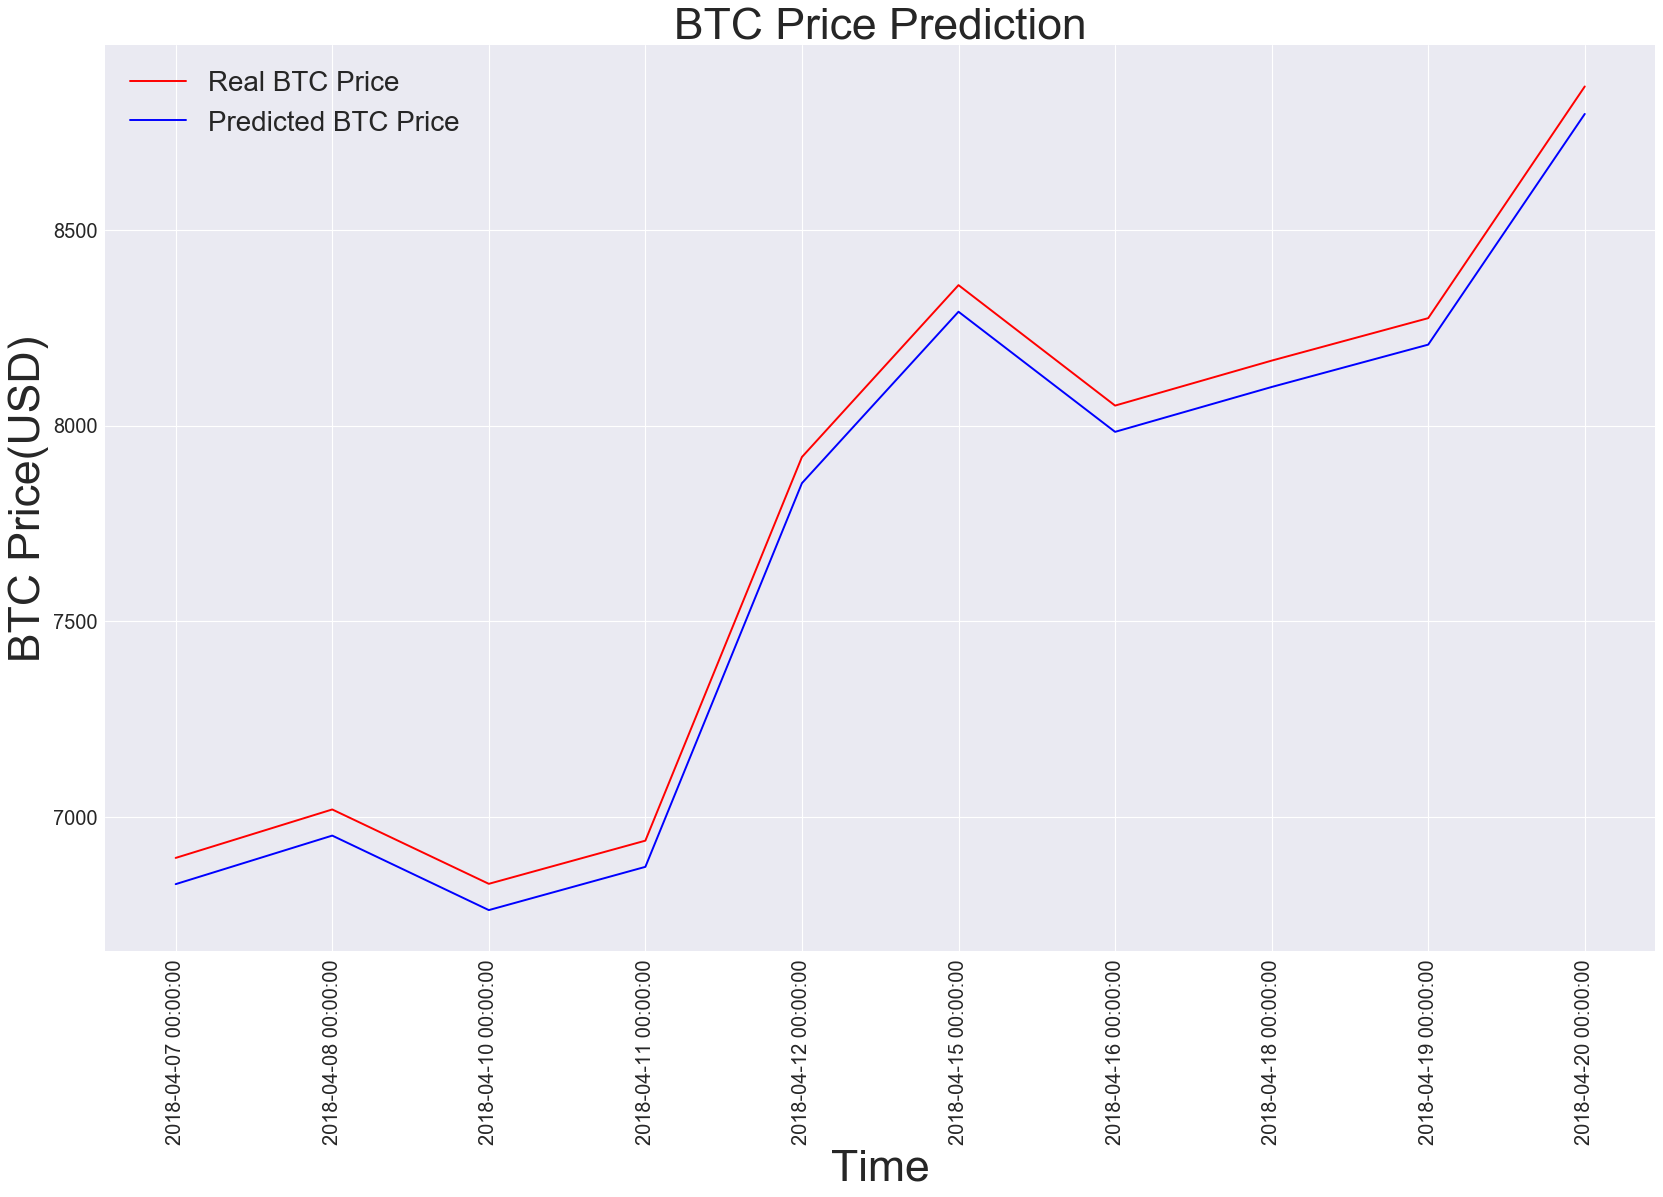

In [304]:
# Visualization
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['Date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

# EVALUATION

Evalutation of first framework which is RNN performed satisfactory results in predicting the stock prices(refer to the graph above).

We will now extend our approach to include sentimental analysis to convert the mood(Buy & sell) into score between 0 to 1. This score along with the historic bitcoin closing prices will be used to predict the bitcoin market prices in the future.

In the future, we hope to extend our hypothesis to include more relevant features and also consider better hyperparameter optimization techniques to ensure better prediction results based on opinion analysis on a wider range of audience.

# Twitter Sentimental Analysis

### 1. Extracting twitter data (tweepy + pandas)

1.1. Importing libraries

In [9]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

from tweepy import OAuthHandler

### 1.2. Creating a Twitter 

In order to extract tweets for a posterior analysis, we need to access to our Twitter account and create an app. The website to do this is https://apps.twitter.com/. 
(This tutorial video(https://www.youtube.com/watch?v=BOA7SD_09Qk) mentions how to create an account and an application.)

From this app that we're creating we will save the following information in a script called credentials.py:

* Consumer Key (API Key)
* Consumer Secret (API Secret)
* Access Token
* Access Token Secret

In [10]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = '1VjOzY0RJxH7yUyg1TykSmdxk'
CONSUMER_SECRET = 'ALPYNOQ7qlJsfmf4B54TyK1F5nL8U72Z1Afw4eyllm5MZza3mj'

# Access:
ACCESS_TOKEN  = '806020958708338688-zzgkg10PtN5CHWTTu1yFoUTnxt0v77R'
ACCESS_SECRET = 'rDplRyw9KGh5nAm3yUuzzchLwNWOkbBqNpDlKF5jgN3g7'

In [11]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [12]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="@Bitcoin", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

London based financial services startup Revolut raises $250M Series C round, announces they will be adding Bitcoin… https://t.co/IFa76vZc8T

RT @ChrisPacia: If you support a community which deletes tens of thousands of comments which express a dissenting opinion, don't talk to me…

Infographic: A Tale of Two Coins 

https://t.co/JJnKFA029m https://t.co/xIP9cqOVq9

@Lucid420 How does a decentralized currency have partners? It just has users.

Bitcoin is a peer-to-peer electronic CASH system. If you like Bitcoin, you should be using it, not just squirreling… https://t.co/plqg7YB6Yu



### 1.3. Tweets extraction

In [13]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="@Bitcoin", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

London based financial services startup Revolut raises $250M Series C round, announces they will be adding Bitcoin… https://t.co/IFa76vZc8T

RT @ChrisPacia: If you support a community which deletes tens of thousands of comments which express a dissenting opinion, don't talk to me…

Infographic: A Tale of Two Coins 

https://t.co/JJnKFA029m https://t.co/xIP9cqOVq9

@Lucid420 How does a decentralized currency have partners? It just has users.

Bitcoin is a peer-to-peer electronic CASH system. If you like Bitcoin, you should be using it, not just squirreling… https://t.co/plqg7YB6Yu



### 1.4. Creating a (pandas) DataFrame

In [14]:
# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,London based financial services startup Revolu...
1,RT @ChrisPacia: If you support a community whi...
2,Infographic: A Tale of Two Coins \n\nhttps://t...
3,@Lucid420 How does a decentralized currency ha...
4,Bitcoin is a peer-to-peer electronic CASH syst...
5,Bitcoin Cash NFC cards? Yes please! \n\nhttps:...
6,Hey #Developers: 0.6 BCH Bounty for two Electr...
7,1. BTC mempool gets clogged thanks to 1MB bloc...
8,"RT @cryptartica: Yesterday, we announced Crypt..."
9,@M00nPapa @TheCryptoPiglet @justicemate There ...


In [18]:
# Internal methods of a single tweet object:
print(dir(tweets[5]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


### 1.5. Adding relevant info to our dataframe

In [19]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

989781547195613185
2018-04-27 08:21:24
Twitter Web Client
175
78
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/IFa76vZc8T', 'expanded_url': 'https://twitter.com/i/web/status/989781547195613185', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [116, 139]}]}


In [20]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [21]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,London based financial services startup Revolu...,139,989781547195613185,2018-04-27 08:21:24,Twitter Web Client,175,78
1,RT @ChrisPacia: If you support a community whi...,140,989746542926905344,2018-04-27 06:02:19,Twitter Web Client,0,65
2,Infographic: A Tale of Two Coins \n\nhttps://t...,82,989743696039108608,2018-04-27 05:51:00,TweetDeck,171,62
3,@Lucid420 How does a decentralized currency ha...,77,989717113882394624,2018-04-27 04:05:22,Twitter Web Client,4,3
4,Bitcoin is a peer-to-peer electronic CASH syst...,140,989712994333585408,2018-04-27 03:49:00,TweetDeck,244,63
5,Bitcoin Cash NFC cards? Yes please! \n\nhttps:...,85,989685814786342913,2018-04-27 02:01:00,TweetDeck,139,43
6,Hey #Developers: 0.6 BCH Bounty for two Electr...,118,989660146216382464,2018-04-27 00:19:00,TweetDeck,75,23
7,1. BTC mempool gets clogged thanks to 1MB bloc...,139,989623906997821440,2018-04-26 21:55:00,TweetDeck,316,110
8,"RT @cryptartica: Yesterday, we announced Crypt...",140,989610113899028480,2018-04-26 21:00:11,Twitter Web Client,0,45
9,@M00nPapa @TheCryptoPiglet @justicemate There ...,108,989606409321922560,2018-04-26 20:45:28,Twitter Web Client,20,2


# 2. Visualization and basic statistics

### 2.1. Averages and popularity

In [22]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 104.66


In [23]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Bitcoin Core (BTC) has become nothing more than an expensive ICO for Lightning Network. Meanwhile, BCH is still Bitcoin.
Number of likes: 1023
120 characters.

The tweet with more retweets is: 
JPMorgan "stopped letting customers buy cryptocurrency with credit cards in late January and began treating the pur… https://t.co/t26yCtSM1w
Number of retweets: 412
140 characters.



### 2.2. Time series

In [24]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

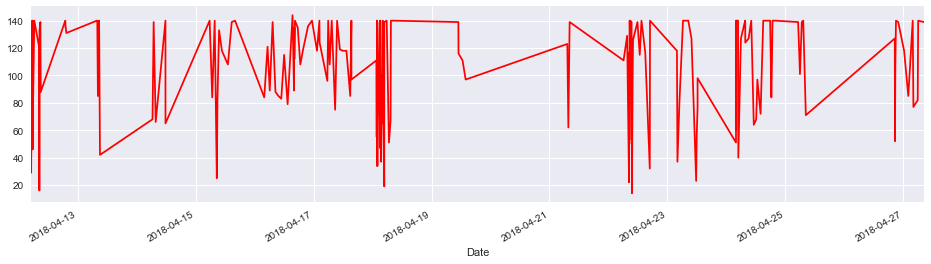

In [25]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

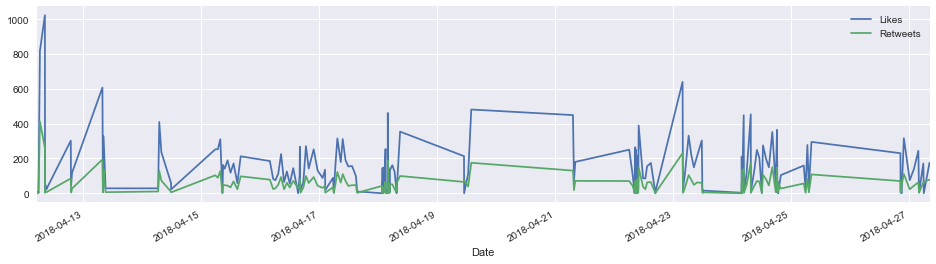

In [26]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [27]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* TweetDeck


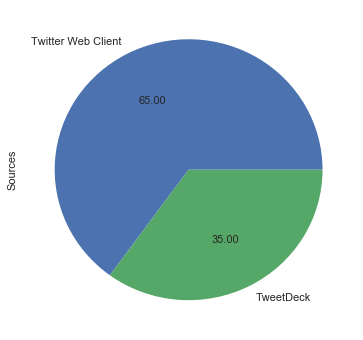

In [28]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [29]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return analysis.sentiment.polarity
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return analysis.sentiment.polarity

In [30]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])
data1 = data.round({'SA': 1})
# We display the updated dataframe with the new column:
display(data1.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,London based financial services startup Revolu...,139,989781547195613185,2018-04-27 08:21:24,Twitter Web Client,175,78,-0.1
1,RT @ChrisPacia: If you support a community whi...,140,989746542926905344,2018-04-27 06:02:19,Twitter Web Client,0,65,0.0
2,Infographic: A Tale of Two Coins \n\nhttps://t...,82,989743696039108608,2018-04-27 05:51:00,TweetDeck,171,62,0.0
3,@Lucid420 How does a decentralized currency ha...,77,989717113882394624,2018-04-27 04:05:22,Twitter Web Client,4,3,0.0
4,Bitcoin is a peer-to-peer electronic CASH syst...,140,989712994333585408,2018-04-27 03:49:00,TweetDeck,244,63,0.0
5,Bitcoin Cash NFC cards? Yes please! \n\nhttps:...,85,989685814786342913,2018-04-27 02:01:00,TweetDeck,139,43,0.0
6,Hey #Developers: 0.6 BCH Bounty for two Electr...,118,989660146216382464,2018-04-27 00:19:00,TweetDeck,75,23,0.0
7,1. BTC mempool gets clogged thanks to 1MB bloc...,139,989623906997821440,2018-04-26 21:55:00,TweetDeck,316,110,-0.1
8,"RT @cryptartica: Yesterday, we announced Crypt...",140,989610113899028480,2018-04-26 21:00:11,Twitter Web Client,0,45,0.2
9,@M00nPapa @TheCryptoPiglet @justicemate There ...,108,989606409321922560,2018-04-26 20:45:28,Twitter Web Client,20,2,0.0


In [31]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data1['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data1['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data1['SA'][index] < 0]

In [32]:
# printing percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data1['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data1['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data1['Tweets'])))

Percentage of positive tweets: 37.0%
Percentage of neutral tweets: 54.0%
Percentage de negative tweets: 9.0%


In [326]:
data1['Date'] = data1['Date'].dt.date

In [327]:
data1.head()

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Why is Bitcoin Cash perfect for micropayments?...,71,989056166046167041,2018-04-25,TweetDeck,287,107,1.0
1,"@CryptoHubNews @theantnest No it doesn't, and ...",140,989040396234784768,2018-04-25,Twitter Web Client,28,5,0.0
2,Whenever you read the comments section of an a...,139,989031252274663424,2018-04-25,TweetDeck,265,78,0.0
3,@justicemate May I repost this image? (Regular...,101,989020149985390592,2018-04-25,Twitter Web Client,25,2,0.2
4,Electron Cash 3.2 is available. Includes new o...,139,989008831169490946,2018-04-25,Twitter Web Client,152,52,0.3


In [328]:
data1.to_csv('SA_Score.csv',index=False)

In [329]:
Twitter_Date_SA = data1.drop(['Tweets', 'len','ID','Source','Likes','RTs'], axis=1)
Twitter_Date_SA.head()

,Date,SA
0,2018-04-25,1.0
1,2018-04-25,0.0
2,2018-04-25,0.0
3,2018-04-25,0.2
4,2018-04-25,0.3


In [330]:
Twitter_Date_SA.to_csv('Date_SA_Score.csv',index=False)

In [331]:
twitter = pd.read_csv('Date_SA_Score.csv', parse_dates=['Date'], index_col='Date')
twitter.tail()

,SA
Date,
2018-04-12,0.0
2018-04-12,0.4
2018-04-12,0.0
2018-04-12,0.0
2018-04-12,0.1


In [332]:
twitter_new = twitter.groupby(twitter.index).mean()
twitter_new.head(13)

,SA
Date,
2018-04-12,0.163636
2018-04-13,-0.060000
2018-04-14,0.080000
2018-04-15,0.145455
2018-04-16,0.105263
2018-04-17,0.006667
2018-04-18,0.156757
2018-04-19,-0.075000
2018-04-21,0.033333


In [333]:
twitter_new.shape

(13, 1)

In [334]:
Bitcoin_14 = btc_usd_datasets_final.tail(14)

In [335]:
Bitcoin_14.head(14)

,Date,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
2399,2018-04-08,6894.3750,7103.3175,6889.6500,7020.2325
2400,2018-04-09,7023.4650,7174.5150,6612.2200,6774.3875
2401,2018-04-10,6776.4825,6891.2750,6656.6525,6830.4575
2402,2018-04-11,6827.1850,6973.8025,6805.5925,6940.6175
2403,2018-04-12,6940.0250,8166.2175,6762.4125,7919.7775
2404,2018-04-13,7920.3425,8229.6175,7752.4325,7887.8550
2405,2018-04-14,7887.2000,8191.6100,7828.1775,8001.1125
2406,2018-04-15,8003.7775,8406.6100,8001.1350,8358.4300
2407,2018-04-16,8360.9050,8417.0175,7905.9825,8050.9825
2408,2018-04-17,8052.6375,8165.1075,7813.6575,7891.8425


In [336]:
Bitcoin_14.to_csv('Bitcoin_14.csv',index=False)

In [337]:
Bitcoin_5 = pd.read_csv('Bitcoin_14.csv', parse_dates=['Date'], index_col='Date')

In [338]:
Bitcoin_5.head()

,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
Date,,,,
2018-04-08,6894.3750,7103.3175,6889.6500,7020.2325
2018-04-09,7023.4650,7174.5150,6612.2200,6774.3875
2018-04-10,6776.4825,6891.2750,6656.6525,6830.4575
2018-04-11,6827.1850,6973.8025,6805.5925,6940.6175
2018-04-12,6940.0250,8166.2175,6762.4125,7919.7775


In [339]:
Bitcoin_5 = Bitcoin_5.reset_index()
twitter_new = twitter_new.reset_index()
new = pd.merge(left=twitter_new, left_on='Date',
         right=Bitcoin_5, right_on='Date',how='outer')

In [340]:
new.head(15)

,Date,SA,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
0,2018-04-12,0.163636,6940.0250,8166.2175,6762.4125,7919.7775
1,2018-04-13,-0.060000,7920.3425,8229.6175,7752.4325,7887.8550
2,2018-04-14,0.080000,7887.2000,8191.6100,7828.1775,8001.1125
3,2018-04-15,0.145455,8003.7775,8406.6100,8001.1350,8358.4300
4,2018-04-16,0.105263,8360.9050,8417.0175,7905.9825,8050.9825
5,2018-04-17,0.006667,8052.6375,8165.1075,7813.6575,7891.8425
6,2018-04-18,0.156757,7891.8200,8254.1275,7872.5800,8165.7500
7,2018-04-19,-0.075000,8165.9025,8299.4750,8092.3975,8274.1525
8,2018-04-21,0.033333,8866.7000,9043.5325,8616.2625,8811.2750
9,2018-04-22,0.073077,NaN,NaN,NaN,NaN


In [341]:
final_bitcoin.to_csv('final_bitcoin.csv',index=False)

In [342]:
Bitcoin_7 = pd.read_csv('final_bitcoin.csv', parse_dates=['Date'], index_col='Date')
Bitcoin_7.sort_index(inplace=True)
Bitcoin_7.drop(Bitcoin_7.tail(1).index,inplace=True)
Bitcoin_6 = Bitcoin_7.round({'SA': 2})
Bitcoin_last6 = Bitcoin_6.tail(7)
Bitcoin_last6 = Bitcoin_last6.iloc[1:]
#Bitcoin_last6 = Bitcoin_last7.replace(np.nan, '', regex=True)
Bitcoin_last6.head(8)

,SA,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
Date,,,,,
2018-04-18,0.16,7891.8200,8254.1275,7872.5800,8165.7500
2018-04-19,-0.08,8165.9025,8299.4750,8092.3975,8274.1525
2018-04-20,NaN,8272.9250,8936.0425,8220.3050,8865.4800
2018-04-21,0.03,8866.7000,9043.5325,8616.2625,8811.2750
2018-04-22,0.07,NaN,NaN,NaN,NaN
2018-04-23,0.04,NaN,NaN,NaN,NaN


# Random Forest Algorithm for Bitcoin Prediction

Based on  "Equity forecast: Predicting long term stock price movement using machine learning" research paper by Nikola Milosevic
https://arxiv.org/ftp/arxiv/papers/1603/1603.00751.pdf I'm using Random Forest for Bitcoin Prediction.

Random Forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because it’s simplicity and the fact that it can be used for both classification and regression tasks.
Random Forest is also considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand.

One of the big problems in machine learning is overfitting, but most of the time this won’t happen that easy to a random forest classifier. That’s because if there are enough trees in the forest, the classifier won’t overfit the model.

#### Use Cases:
The random forest algorithm is used in a lot of different fields, like Banking, Stock Market, Medicine and E-Commerce. In Banking it is used for example to detect customers who will use the bank’s services more frequently than others and repay their debt in time. In this domain it is also used to detect fraud customers who want to scam the bank. In finance, it is used to determine a stock’s behaviour in the future. In the healthcare domain it is used to identify the correct combination of components in medicine and to analyze a patient’s medical history to identify diseases. And lastly, in E-commerce random forest is used to determine whether a customer will actually like the product or not.


In [343]:
from numpy import loadtxt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [344]:
#Bitcoin_4 = Bitcoin_last6.round({'Average Open Price (USD)': 0})
model = svm.SVC(kernel='linear', C=1, gamma=1) 
Bitcoin_last6.head(15)

,SA,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
Date,,,,,
2018-04-18,0.16,7891.8200,8254.1275,7872.5800,8165.7500
2018-04-19,-0.08,8165.9025,8299.4750,8092.3975,8274.1525
2018-04-20,NaN,8272.9250,8936.0425,8220.3050,8865.4800
2018-04-21,0.03,8866.7000,9043.5325,8616.2625,8811.2750
2018-04-22,0.07,NaN,NaN,NaN,NaN
2018-04-23,0.04,NaN,NaN,NaN,NaN


In [345]:
Bitcoin_last6 = Bitcoin_last6.replace(np.nan, 0.01 , regex=True)
cols = ['Average High Price (USD)', 'Average Open Price (USD)','Average Low Price (USD)','Average Close Price (USD)']
Bitcoin_last6[cols] = Bitcoin_last6[cols].applymap(np.int64)

In [346]:
Bitcoin_last6.drop(['Average High Price (USD)', 'Average Open Price (USD)','Average Low Price (USD)'], axis =1)
Bitcoin_last6['SA'].replace([-0.08], 0)

Date
2018-04-18    0.16
2018-04-19    0.00
2018-04-20    0.01
2018-04-21    0.03
2018-04-22    0.07
2018-04-23    0.04
Name: SA, dtype: float64

### Preparing Final dataset for Bitcoin Prediction

In [347]:
Bitcoin_last6.head(10)
Bitcoin_last6 = Bitcoin_last6[:-1]

#### Data Preprocessing

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

 #### Need of Data Preprocessing:
 1• For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
 
 2• Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.


In [348]:
#Preprocessing
from sklearn import preprocessing
Bitcoin_last6.dropna(inplace=True)
X=Bitcoin_last6.drop(['Average Close Price (USD)','Average High Price (USD)','Average Open Price (USD)','Average Low Price (USD)'],axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=Bitcoin_last6['Average Close Price (USD)']

### Splitting the Data in to Train and Test

In [349]:
from sklearn import cross_validation
X_train,X_test,Y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.32,random_state=101)

In [350]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=101,
           verbose=0, warm_start=False)

In [351]:
ypred = reg.predict(X_test)

In [352]:
Bitcoin_last6.head(10)

,SA,Average Open Price (USD),Average High Price (USD),Average Low Price (USD),Average Close Price (USD)
Date,,,,,
2018-04-18,0.16,7891,8254,7872,8165
2018-04-19,-0.08,8165,8299,8092,8274
2018-04-20,0.01,8272,8936,8220,8865
2018-04-21,0.03,8866,9043,8616,8811
2018-04-22,0.07,0,0,0,0


### Printing Predictions

In [353]:
print(ypred)

[ 8821.035  8821.035]


In [354]:
print(Y_train)

Date
2018-04-20    8865
2018-04-19    8274
2018-04-21    8811
Name: Average Close Price (USD), dtype: int64


# Conclusion

The prediction using random Forest and sentimental analysis for 22nd April was **8821.03 USD** and the actual closing price for Bitcoin on 22nd April was **8802.46 USD**.

Below Image from Coinmarketcap Displays historical prices of Bitcoin:

![ActualPrice.png](image/Actual_price.png)




# Future Work

The prediction of the Bitcoin price can be made more accurate by training the model with more data since we are using 7 days data to predict the prices. We can extract more tweets for more dates and calculate the SA score for more training data.
Different Models can be used for more accurate prediction.

# License

##### The code has been documented by <Balaji Mudaliyar> is licensed under the MIT License https://opensource.org/licenses/ 
##### The code has been documented by <Rodolfo Ferro> is licensed under the Apache License http://www.apache.org/licenses/
##### The code has been documented by <Patrick Triest> is licensed under the MIT License https://opensource.org/licenses/MIT

# References

\[1\]</a> Reid F, Harrigan M. An analysis of anonymity in the bitcoin system: Springer; 2013.<br>
\[2\]</a> Böhme R, Christin N, Edelman B, Moore T. Bitcoin: Economics, technology, and governance. The Journal of Economic Perspectives. 2015;29(2):213–38.<br>
\[3\]</a> Nakamoto S. Bitcoin: A peer-to-peer electronic cash system. 2008.<br>
\[4\]</a> Kondor D, Pósfai M, Csabai I, Vattay G. Do the rich get richer? An empirical analysis of the Bitcoin transaction network. PloS one. 2014;9(2):e86197 doi: [10.1371/journal.pone.0086197](http://dx.doi.org/10.1371/journal.pone.0086197) [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3914786/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/24505257)<br>
\[5\]</a> Ron D, Shamir A. Quantitative analysis of the full bitcoin transaction graph Financial Cryptography and Data Security: Springer; 2013. p. 6–24.<br>
\[6\]</a> Garcia D, Tessone CJ, Mavrodiev P, Perony N. The digital traces of bubbles: feedback cycles between socio-economic signals in the Bitcoin economy. Journal of the Royal Society Interface. 2014;11(99):20140623. [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4233744/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/25100315)<br>
\[7\] Kondor D, Csabai I, Szüle J, Pósfai M, Vattay G. Inferring the interplay between network structure and market effects in Bitcoin. New Journal of Physics. 2014;16(12):125003.<br>
\[8\] Kristoufek L. BitCoin meets Google Trends and Wikipedia: Quantifying the relationship between phenomena of the Internet era. Scientific reports. 2013;3. [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3849639/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/24301322)<br>
\[9\] Kristoufek L. What are the main drivers of the Bitcoin price? Evidence from wavelet coherence analysis. PloS one. 2015;10(4):e0123923 doi: [10.1371/journal.pone.0123923](http://dx.doi.org/10.1371/journal.pone.0123923) [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4398561/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/25874694)<br>
\[10\] Yelowitz A, Wilson M. Characteristics of Bitcoin users: an analysis of Google search data. Applied Economics Letters. 2015;22(13):1030–6.<br>
\[11\] https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-